In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from config_MIMIC import get_diseases, get_diseases_abbr

In [2]:
plt.rcParams['pdf.fonttype']=42 #ensures true fonte types are embedded in the pdf 
plt.rcParams['ps.fonttype']=42 # Applies the same setting for post script output

In [3]:
number_of_runs=5
significance_level=1.96 # for 95% ci
height = 6
font_size=11
rotation_degree =15

In [4]:
seed_19_sex = pd.read_csv("./FNR_GAPS/Run_seed19_FNR_GAP_sex.csv",index_col=0)
seed_31_sex = pd.read_csv("./FNR_GAPS/Run_seed31_FNR_GAP_sex.csv",index_col=0)
seed_38_sex = pd.read_csv("./FNR_GAPS/Run_seed38_FNR_GAP_sex.csv",index_col=0)
seed_47_sex = pd.read_csv("./FNR_GAPS/Run_seed47_FNR_GAP_sex.csv",index_col=0)
seed_77_sex = pd.read_csv("./FNR_GAPS/Run_seed77_FNR_GAP_sex.csv",index_col=0)
seed_77_sex.head(5)

,#M,FNR_M,Gap_M,#F,FNR_F,Gap_F
diseases,,,,,,
Enlarged Cardiomediastinum,422,0.820,-0.056201,339,0.876,0.056201
Cardiomegaly,2551,0.346,0.002361,1890,0.343,-0.002361
Lung Opacity,2817,0.256,-0.051069,2087,0.307,0.051069
Lung Lesion,297,0.593,-0.122541,337,0.715,0.122541
Edema,1545,0.339,0.020867,1241,0.318,-0.020867


In [5]:
seed_19_age = pd.read_csv("./FNR_GAPS/Run_seed19_FNR_GAP_Age.csv",index_col=0)
seed_31_age = pd.read_csv("./FNR_GAPS/Run_seed31_FNR_GAP_Age.csv",index_col=0)
seed_38_age = pd.read_csv("./FNR_GAPS/Run_seed38_FNR_GAP_Age.csv",index_col=0)
seed_47_age = pd.read_csv("./FNR_GAPS/Run_seed47_FNR_GAP_Age.csv",index_col=0)
seed_77_age = pd.read_csv("./FNR_GAPS/Run_seed77_FNR_GAP_Age.csv",index_col=0)
seed_77_age.head(5)

,#60-80,FNR_60-80,Gap_60-80,#40-60,FNR_40-60,Gap_40-60,#20-40,FNR_20-40,Gap_20-40,#80-,FNR_80-,Gap_80-,#0-20,FNR_0-20,Gap_0-20
diseases,,,,,,,,,,,,,,,
Enlarged Cardiomediastinum,326,0.831,-0.007842,230,0.839,0.000000,71,0.831,-0.008145,132,0.894,0.054809,2.0,1.000,0.160870
Cardiomegaly,2113,0.334,-0.065608,1077,0.399,0.000000,280,0.407,0.007886,955,0.288,-0.111299,16.0,0.438,0.038243
Lung Opacity,2196,0.279,0.000000,1293,0.292,0.012426,383,0.287,0.008062,1024,0.252,-0.027191,8.0,0.250,-0.029144
Lung Lesion,338,0.639,-0.037616,152,0.638,-0.038512,42,0.714,0.037616,102,0.725,0.048821,2.0,NaN,NaN
Edema,1303,0.311,-0.039680,699,0.351,0.000000,127,0.520,0.169184,655,0.308,-0.042104,3.0,0.500,0.149499


In [6]:
seed_19_race = pd.read_csv("./FNR_GAPS/Run_seed19_FNR_GAP_race.csv",index_col=0)
seed_31_race = pd.read_csv("./FNR_GAPS/Run_seed31_FNR_GAP_race.csv",index_col=0)
seed_38_race = pd.read_csv("./FNR_GAPS/Run_seed38_FNR_GAP_race.csv",index_col=0)
seed_47_race = pd.read_csv("./FNR_GAPS/Run_seed47_FNR_GAP_race.csv",index_col=0)
seed_77_race = pd.read_csv("./FNR_GAPS/Run_seed77_FNR_GAP_race.csv",index_col=0)
seed_77_race.head(3)

,#White,FNR_White,Gap_White,#Black,FNR_Black,Gap_Black,#Hisp,FNR_Hisp,Gap_Hisp,#Other,FNR_Other,Gap_Other,#Asian,FNR_Asian,Gap_Asian,#American,FNR_American,Gap_American
diseases,,,,,,,,,,,,,,,,,,
Enlarged Cardiomediastinum,543,0.834,-0.035998,96,0.948,0.077665,54,0.759,-0.110993,32,0.906,0.035998,22,1.000,0.129748,14.0,0.500,-0.370252
Cardiomegaly,2972,0.348,-0.007547,745,0.309,-0.047072,311,0.363,0.007547,222,0.329,-0.026968,160,0.412,0.056703,31.0,0.452,0.095816
Lung Opacity,3445,0.266,-0.040223,772,0.317,0.010951,252,0.337,0.030896,259,0.216,-0.090190,132,0.333,0.026927,44.0,0.295,-0.010951


In [7]:
seed_19_insurance = pd.read_csv("./FNR_GAPS/Run_seed19_FNR_GAP_insurance.csv",index_col=0)
seed_31_insurance = pd.read_csv("./FNR_GAPS/Run_seed31_FNR_GAP_insurance.csv",index_col=0)
seed_38_insurance = pd.read_csv("./FNR_GAPS/Run_seed38_FNR_GAP_insurance.csv",index_col=0)
seed_47_insurance = pd.read_csv("./FNR_GAPS/Run_seed47_FNR_GAP_insurance.csv",index_col=0)
seed_77_insurance = pd.read_csv("./FNR_GAPS/Run_seed77_FNR_GAP_insurance.csv",index_col=0)
seed_77_insurance.head(3)

,#medicare,FNR_medicare,Gap_medicare,#other,FNR_other,Gap_other,#medicaid,FNR_medicaid,Gap_medicaid
diseases,,,,,,,,,
Enlarged Cardiomediastinum,336,0.857,0.021526,365,0.836,0.000000,60,0.833,-0.002283
Cardiomegaly,2353,0.330,-0.026206,1809,0.356,0.000000,279,0.398,0.041852
Lung Opacity,2477,0.275,0.000000,2029,0.283,0.007565,398,0.261,-0.014027


In [8]:
diseases=get_diseases()

diseases = [disease for disease in diseases if disease != 'No Finding']

diseases_abbr =get_diseases_abbr()


## 1. Gender

In [9]:
sex_dataframes = [seed_19_sex, seed_31_sex, seed_38_sex, seed_47_sex, seed_77_sex]
result_sex = pd.concat(sex_dataframes)

In [10]:
result_sex_grouped =result_sex.groupby("diseases")
result_sex_grouped_Stat = result_sex_grouped.describe()

In [11]:
result_sex_grouped_Stat

#M                                               \
                           count    mean  std     min     25%     50%     75%   
diseases                                                                        
Atelectasis                  5.0  2702.0  0.0  2702.0  2702.0  2702.0  2702.0   
Cardiomegaly                 5.0  2551.0  0.0  2551.0  2551.0  2551.0  2551.0   
Consolidation                5.0   621.0  0.0   621.0   621.0   621.0   621.0   
Edema                        5.0  1545.0  0.0  1545.0  1545.0  1545.0  1545.0   
Enlarged Cardiomediastinum   5.0   422.0  0.0   422.0   422.0   422.0   422.0   
Fracture                     5.0   239.0  0.0   239.0   239.0   239.0   239.0   
Lung Lesion                  5.0   297.0  0.0   297.0   297.0   297.0   297.0   
Lung Opacity                 5.0  2817.0  0.0  2817.0  2817.0  2817.0  2817.0   
No Finding                   5.0  3467.0  0.0  3467.0  3467.0  3467.0  3467.0   
Pleural Effusion             5.0  3107.0  0.0  3107.0  3107.0  3107.0  3107.0   
Pleural Other                5.0   126.0  0.0   126.0   126.0   126.0   126.0   
Pneumonia                    5.0   959.0  0.0   959.0   959.0   959.0   959.0   
Pneumothorax                 5.0   594.0  0.0   594.0   594.0   594.0   594.0   
Support Devices              5.0  3945.0  0.0  3945.0  3945.0  3945.0  3945.0   

                                   FNR_M          ...  FNR_F        Gap_F  \
                               max count    mean  ...    75%    max count   
diseases                                          ...                       
Atelectasis                 2702.0   5.0  0.2762  ...  0.318  0.364   5.0   
Cardiomegaly                2551.0   5.0  0.3234  ...  0.329  0.343   5.0   
Consolidation                621.0   5.0  0.5864  ...  0.697  0.728   5.0   
Edema                       1545.0   5.0  0.3616  ...  0.347  0.371   5.0   
Enlarged Cardiomediastinum   422.0   5.0  0.8170  ...  0.879  0.900   5.0   
Fracture                     239.0   5.0  0.7138  ...  0.750  0.756   5.0   
Lung Lesion                  297.0   5.0  0.6176  ...  0.733  0.754   5.0   
Lung Opacity                2817.0   5.0  0.2812  ...  0.316  0.360   5.0   
No Finding                  3467.0   5.0  0.2736  ...  0.198  0.202   5.0   
Pleural Effusion            3107.0   5.0  0.2160  ...  0.218  0.248   5.0   
Pleural Other                126.0   5.0  0.7778  ...  0.829  0.854   5.0   
Pneumonia                    959.0   5.0  0.6692  ...  0.708  0.715   5.0   
Pneumothorax                 594.0   5.0  0.5230  ...  0.572  0.577   5.0   
Support Devices             3945.0   5.0  0.0948  ...  0.121  0.126   5.0   

                                                                              \
                                mean       std       min       25%       50%   
diseases                                                                       
Atelectasis                 0.040875  0.018294  0.012122  0.036727  0.042543   
Cardiomegaly               -0.008537  0.005811 -0.016546 -0.010325 -0.010119   
Consolidation               0.089105  0.014177  0.075080  0.075506  0.088215   
Edema                      -0.021473  0.013765 -0.038421 -0.031421 -0.020867   
Enlarged Cardiomediastinum  0.042525  0.031844 -0.004488  0.024333  0.056201   
Fracture                    0.016192  0.015350 -0.003138  0.005370  0.019293   
Lung Lesion                 0.108901  0.026904  0.066841  0.105706  0.110042   
Lung Opacity                0.032722  0.015554  0.016653  0.022545  0.025763   
No Finding                 -0.081790  0.004020 -0.085591 -0.085360 -0.082813   
Pleural Effusion            0.004470  0.008957 -0.005942 -0.001570  0.004362   
Pleural Other               0.044173  0.030400  0.012389  0.019164  0.039295   
Pneumonia                   0.005169  0.015651 -0.014463 -0.008662  0.012747   
Pneumothorax                0.023729  0.015309  0.000084  0.020286  0.026545   
Support Devices             0.024040  0.002700  0.019757  0.02

In [12]:
sex_df_male_mean = result_sex_grouped_Stat['#M']['mean']

sex_df_male_gap = result_sex_grouped_Stat['Gap_M']["mean"]
sex_df_male_ci = significance_level * result_sex_grouped_Stat['Gap_M']["std"] / np.sqrt(number_of_runs)

sex_df_female_mean = result_sex_grouped_Stat['#F']['mean']
sex_df_female_gap = result_sex_grouped_Stat['Gap_F']["mean"]
sex_df_female_ci = significance_level * result_sex_grouped_Stat['Gap_F']["std"] / np.sqrt(number_of_runs)


In [13]:
#Want = pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))
percent_male_list = []
ci_male_list = []
gap_male_mean_list = []

diseases_abbr_list = []
distance_list = []

percent_female_list = []
ci_female_list = []
percent_female_list = []
gap_femal_mean_list = []

In [ ]:
for disease in diseases:
  
  percent_male_list.append(sex_df_male_mean[disease])
  gap_male_mean_list.append(sex_df_male_gap[disease])
  ci_male_list.append(sex_df_male_ci[disease])

  percent_female_list.append(sex_df_female_mean[disease])
  gap_femal_mean_list.append(sex_df_female_gap[disease])
  ci_female_list.append(sex_df_female_ci[disease])

  distance_list.append(np.absolute(sex_df_female_gap[disease] - sex_df_male_gap[disease]))
  diseases_abbr_list.append(diseases_abbr[disease])

d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "#M": percent_male_list, 'Gap_M_mean': gap_male_mean_list, 'CI_M': ci_male_list,
     "#F": percent_female_list, 'Gap_F_mean': gap_femal_mean_list, 'CI_F': ci_female_list
     }

sex_tpr_disp_df = pd.DataFrame(d)
sex_tpr_disp_df = sex_tpr_disp_df.sort_values(by ='Distance' )

In [15]:
sex_tpr_disp_df

,diseases,diseases_abbr,Distance,%M,Gap_M_mean,CI_M,%F,Gap_F_mean,CI_F
9,Pleural Effusion,Effusion,0.008940,3107.0,-0.004470,0.007851,2295.0,0.004470,0.007851
6,Pneumonia,Pneumonia,0.010337,959.0,-0.005169,0.013719,593.0,0.005169,0.013719
1,Cardiomegaly,Cardiomegaly,0.017074,2551.0,0.008537,0.005094,1890.0,-0.008537,0.005094
11,Fracture,Fracture,0.032385,239.0,-0.016192,0.013455,180.0,0.016192,0.013455
4,Edema,Edema,0.042947,1545.0,0.021473,0.012066,1241.0,-0.021473,0.012066
8,Pneumothorax,Pneumothorax,0.047458,594.0,-0.023729,0.013419,362.0,0.023729,0.013419
12,Support Devices,Sup. Devices,0.048080,3945.0,-0.024040,0.002366,2669.0,0.024040,0.002366
2,Lung Opacity,Air. Opacity,0.065445,2817.0,-0.032722,0.013633,2087.0,0.032722,0.013633
7,Atelectasis,Atelectasis,0.081751,2702.0,-0.040875,0.016035,1825.0,0.040875,0.016035
0,Enlarged Cardiomediastinum,Enlarged Card.,0.085051,422.0,-0.042525,0.027912,339.0,0.042525,0.027912


In [17]:
sex_tpr_disp_df.to_csv("./FNR_GAPS/sex_fnr_disp.csv",index=False)

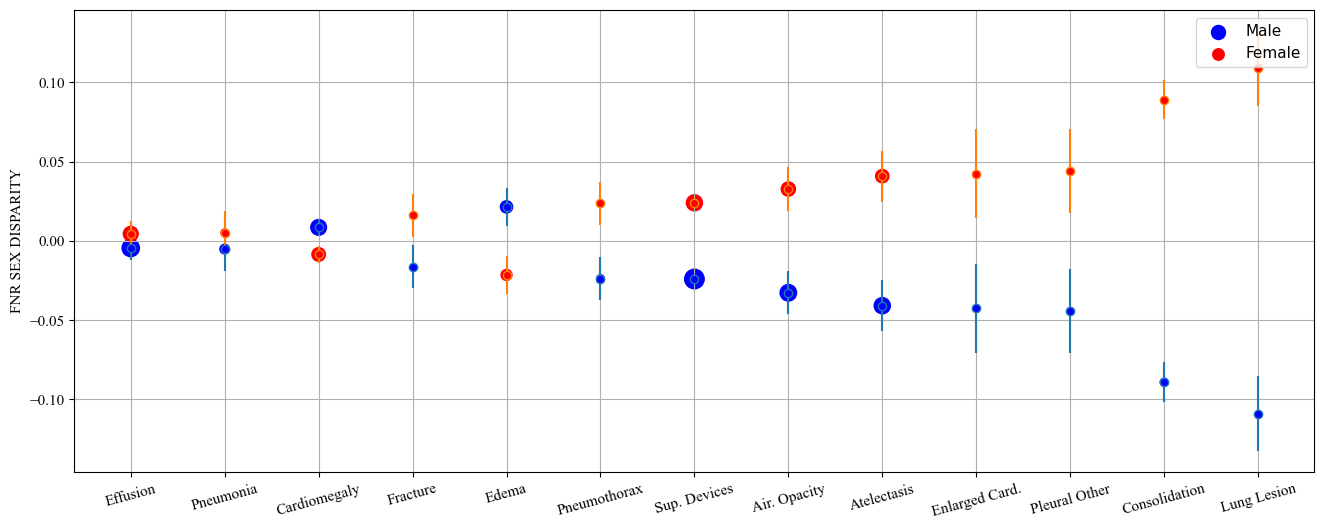

In [21]:

plt.rcParams.update({'font.size': font_size})

plt.figure(figsize=(16,height))
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
            s= np.multiply(sex_tpr_disp_df['%M'],0.05), marker='o',color='blue', label="Male")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
             yerr = sex_tpr_disp_df['CI_M'],fmt='o',mfc='blue')
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
            s= np.multiply(sex_tpr_disp_df['%F'],0.05), marker='o',color='red', label="Female")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
             yerr = sex_tpr_disp_df['CI_F'],fmt='o',mfc='red')

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.ylabel("FNR SEX DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./FNR_GAPS/FNR_Dis_SEX.pdf")


## 2. Age

In [22]:
age_dataframes = [seed_19_age, seed_31_age, seed_38_age, seed_47_age, seed_77_age]
result_age_df= pd.concat(age_dataframes)

result_age_grouped =result_age_df.groupby("diseases")
result_age_grouped_stat = result_age_grouped.describe()


In [23]:
age_df_40_mean = result_age_grouped_stat['#40-60']['mean']
age_df_40_gap = result_age_grouped_stat['Gap_40-60']["mean"]
age_df_40_ci = significance_level*result_age_grouped_stat['Gap_40-60']["std"]/np.sqrt(number_of_runs)

In [24]:
age_df_60_mean = result_age_grouped_stat['#60-80']['mean']
age_df_60_gap = result_age_grouped_stat['Gap_60-80']["mean"]
age_df_60_ci = significance_level*result_age_grouped_stat['Gap_60-80']["std"]/np.sqrt(number_of_runs)

In [25]:
age_df_20_mean = result_age_grouped_stat['#20-40']['mean']
age_df_20_gap = result_age_grouped_stat['Gap_20-40']["mean"]
age_df_20_ci = significance_level*result_age_grouped_stat['Gap_20-40']["std"]/np.sqrt(number_of_runs)

In [27]:
age_df_80_mean = result_age_grouped_stat['#80-']['mean']
age_df_80_gap = result_age_grouped_stat['Gap_80-']["mean"]
age_df_80_ci = significance_level*result_age_grouped_stat['Gap_80-']["std"]/np.sqrt(number_of_runs)

In [28]:
age_df_0_mean = result_age_grouped_stat['#0-20']['mean']
age_df_0_gap = result_age_grouped_stat['Gap_0-20']["mean"]
age_df_0_ci = significance_level*result_age_grouped_stat['Gap_0-20']["std"]/np.sqrt(number_of_runs)

In [29]:
age_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [30]:
prcent_40_list = []
ci_40_list = []
gap_40_mean_list = []
diseases_abbr_list = []
distance_list = []

prcent_60_list = []
ci_60_list = []
prcent_60_list = []
gap_60_mean_list = []

prcent_20_list = []
ci_20_list = []
prcent_20_list = []
gap_20_mean_list = []

prcent_80_list = []
ci_80_list = []
prcent_80_list = []
gap_80_mean_list = []

prcent_0_list = []
ci_0_list = []
prcent_0_list = []
gap_0_mean_list = []
mean_list = []


In [31]:
for disease in diseases:
    mean_list = []
    cleaned_mean_gap_list = []
    prcent_40_list.append(age_df_40_mean[disease])
    gap_40_mean_list.append(age_df_40_gap[disease])
    ci_40_list.append(age_df_40_ci[disease])
    mean_list.append(age_df_40_gap[disease])

    prcent_60_list.append(age_df_60_mean[disease])
    gap_60_mean_list.append(age_df_60_gap[disease])
    ci_60_list.append(age_df_60_ci[disease])
    mean_list.append(age_df_60_gap[disease])

    prcent_20_list.append(age_df_20_mean[disease])
    gap_20_mean_list.append(age_df_20_gap[disease])
    ci_20_list.append(age_df_20_ci[disease])
    mean_list.append(age_df_20_gap[disease])

    prcent_80_list.append(age_df_80_mean[disease])
    gap_80_mean_list.append(age_df_80_gap[disease])
    ci_80_list.append(age_df_80_ci[disease])
    mean_list.append(age_df_80_gap[disease])

    prcent_0_list.append(age_df_0_mean[disease])
    gap_0_mean_list.append(age_df_0_gap[disease])
    ci_0_list.append(age_df_0_ci[disease])
    mean_list.append(age_df_0_gap[disease])


    cleaned_mean_gap_list = [x for x in mean_list if str(x) != 'nan']
    distance_list.append(np.max(cleaned_mean_gap_list) - np.min(cleaned_mean_gap_list))
    diseases_abbr_list.append(diseases_abbr[disease])

In [32]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "#40-60": prcent_40_list, 'Gap_40-60_mean': gap_40_mean_list, 'CI_40-60': ci_40_list,
     "#60-80": prcent_60_list, 'Gap_60-80_mean': gap_60_mean_list, 'CI_60-80': ci_60_list,
     "#20-40": prcent_20_list, 'Gap_20-40_mean': gap_20_mean_list, 'CI_20-40': ci_20_list,
     "#80-": prcent_80_list, 'Gap_80-_mean': gap_80_mean_list, 'CI_80-': ci_80_list,
     "#0-20": prcent_0_list, 'Gap_0-20_mean': gap_0_mean_list, 'CI_0-20': ci_0_list
     }
age_tpr_disp_df = pd.DataFrame(d)

In [33]:
age_tpr_disp_df = age_tpr_disp_df.sort_values(by ='Distance' )
age_tpr_disp_df.to_csv("./FNR_GAPS/age_tpr_disp.csv",index=False)

In [34]:
plt.rcParams.update({'font.size': font_size})

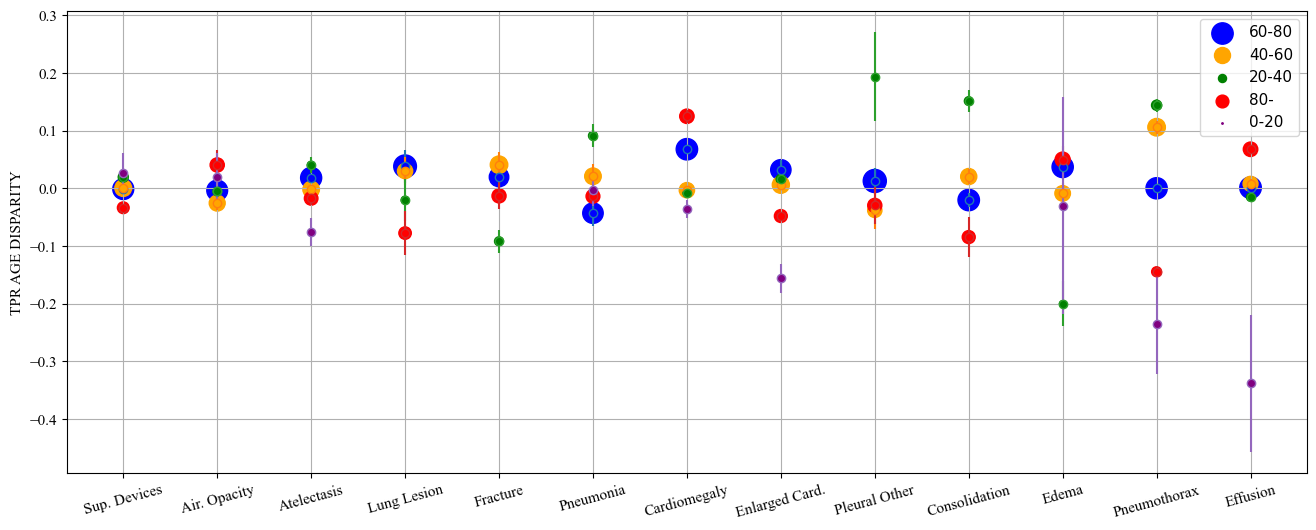

In [ ]:
plt.figure(figsize=(16,height))
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
            s= np.multiply(age_tpr_disp_df['%60-80'],0.5), marker='o',color='blue', label="60-80")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
             yerr = age_tpr_disp_df['CI_60-80'],fmt='o',mfc='blue')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
            s= np.multiply(age_tpr_disp_df['%40-60'],0.5), marker='o',color='orange', label="40-60")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
             yerr = age_tpr_disp_df['CI_40-60'],fmt='o',mfc='orange')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
            s= np.multiply(age_tpr_disp_df['%20-40'],0.5), marker='o',color='green', label="20-40")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
             yerr = age_tpr_disp_df['CI_20-40'],fmt='o',mfc='green')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
            s= np.multiply(age_tpr_disp_df['%80-'],0.5), marker='o',color='red', label="80-")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
             yerr = age_tpr_disp_df['CI_80-'],fmt='o',mfc='red')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
            s= np.multiply(age_tpr_disp_df['%0-20'],0.5), marker='o',color='purple', label="0-20")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
             yerr = age_tpr_disp_df['CI_0-20'],fmt='o',mfc='purple')


plt.xticks(rotation = rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("FNR AGE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./FNR_GAPS/TPR_Dis_AGE.pdf")

## 3. Race

In [35]:
race_dataframes = [seed_19_race, seed_31_race, seed_38_race, seed_47_race, seed_77_race]
result_race_df= pd.concat(race_dataframes)

result_race_grouped =result_race_df.groupby("diseases")
result_race_grouped_stat = result_race_grouped.describe()

In [36]:
result_race_grouped_stat

#White                                       \
                            count    mean  std     min     25%     50%   
diseases                                                                 
Atelectasis                   5.0  3260.0  0.0  3260.0  3260.0  3260.0   
Cardiomegaly                  5.0  2972.0  0.0  2972.0  2972.0  2972.0   
Consolidation                 5.0   700.0  0.0   700.0   700.0   700.0   
Edema                         5.0  1965.0  0.0  1965.0  1965.0  1965.0   
Enlarged Cardiomediastinum    5.0   543.0  0.0   543.0   543.0   543.0   
Fracture                      5.0   327.0  0.0   327.0   327.0   327.0   
Lung Lesion                   5.0   451.0  0.0   451.0   451.0   451.0   
Lung Opacity                  5.0  3445.0  0.0  3445.0  3445.0  3445.0   
No Finding                    5.0  4229.0  0.0  4229.0  4229.0  4229.0   
Pleural Effusion              5.0  3943.0  0.0  3943.0  3943.0  3943.0   
Pleural Other                 5.0   133.0  0.0   133.0   133.0   133.0   
Pneumonia                     5.0  1096.0  0.0  1096.0  1096.0  1096.0   
Pneumothorax                  5.0   721.0  0.0   721.0   721.0   721.0   
Support Devices               5.0  4622.0  0.0  4622.0  4622.0  4622.0   

                                           FNR_White          ...  \
                               75%     max     count    mean  ...   
diseases                                                      ...   
Atelectasis                 3260.0  3260.0       5.0  0.2762  ...   
Cardiomegaly                2972.0  2972.0       5.0  0.3200  ...   
Consolidation                700.0   700.0       5.0  0.6274  ...   
Edema                       1965.0  1965.0       5.0  0.3372  ...   
Enlarged Cardiomediastinum   543.0   543.0       5.0  0.8312  ...   
Fracture                     327.0   327.0       5.0  0.6980  ...   
Lung Lesion                  451.0   451.0       5.0  0.6850  ...   
Lung Opacity                3445.0  3445.0       5.0  0.2858  ...   
No Finding                  4229.0  4229.0       5.0  0.2588  ...   
Pleural Effusion            3943.0  3943.0       5.0  0.2136  ...   
Pleural Other                133.0   133.0       5.0  0.7712  ...   
Pneumonia                   1096.0  1096.0       5.0  0.6896  ...   
Pneumothorax                 721.0   721.0       5.0  0.5262  ...   
Support Devices             4622.0  4622.0       5.0  0.1038  ...   

                           FNR_American        Gap_American            \
                                    75%    max        count      mean   
diseases                                                                
Atelectasis                       0.118  0.176          5.0 -0.170438   
Cardiomegaly                      0.452  0.452          5.0  0.076775   
Consolidation                     0.889  0.889          5.0  0.199853   
Edema                             0.556  0.556          5.0  0.138132   
Enlarged Cardiomediastinum        0.500  0.500          5.0 -0.377856   
Fracture                          1.000  1.000          5.0  0.192009   
Lung Lesion                         NaN    NaN          0.0       NaN   
Lung Opacity                      0.318  0.341          5.0 -0.006001   
No Finding                        0.582  0.582          5.0  0.310698   
Pleural Effusion                  0.303  0.333          5.0  0.065686   
Pleural Other                       NaN    NaN          0.0       NaN   
Pneumonia                         0.857  0.857          5.0  0.173787   
Pneumothorax                      0.000  0.000          5.0 -0.541792   
Support Devices                   0.027  0.036          5.0 -0.073167   

                                                                              \
                                 std       min       25%       50%       75%   
diseases                                                                       
Atelectasis                 0.026038 -0.201539 -0.181319 -0.172892 -0.166008   
Cardiomegaly                0.04

In [37]:
race_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [38]:
race_df_white_mean = result_race_grouped_stat['#White']['mean']
race_df_white_gap = result_race_grouped_stat['Gap_White']["mean"]
race_df_white_ci= significance_level * result_race_grouped_stat['Gap_White']["std"] / np.sqrt(number_of_runs)

In [39]:
race_df_black_mean = result_race_grouped_stat['#Black']['mean']
race_df_black_gap = result_race_grouped_stat['Gap_Black']["mean"]
race_df_black_ci= significance_level * result_race_grouped_stat['Gap_Black']["std"] / np.sqrt(number_of_runs)

In [40]:
race_df_hisp_mean = result_race_grouped_stat['#Hisp']['mean']
race_df_hisp_gap = result_race_grouped_stat['Gap_Hisp']["mean"]
race_df_hisp_ci= significance_level * result_race_grouped_stat['Gap_Hisp']["std"] / np.sqrt(number_of_runs)


In [41]:
race_df_other_mean = result_race_grouped_stat['#Other']['mean']
race_df_other_gap = result_race_grouped_stat['Gap_Other']["mean"]
race_df_other_ci= significance_level * result_race_grouped_stat['Gap_Other']["std"] / np.sqrt(number_of_runs)


In [42]:
race_df_asian_mean = result_race_grouped_stat['#Asian']['mean']
race_df_asian_gap = result_race_grouped_stat['Gap_Asian']["mean"]
race_df_asian_ci= significance_level * result_race_grouped_stat['Gap_Asian']["std"] / np.sqrt(number_of_runs)

In [43]:
race_df_american_mean = result_race_grouped_stat['#American']['mean']
race_df_american_gap = result_race_grouped_stat['Gap_American']["mean"]
race_df_american_ci= significance_level * result_race_grouped_stat['Gap_American']["std"] / np.sqrt(number_of_runs)


In [44]:
percent_asian_list = []
ci_asian_list = []
gap_asian_mean_list = []


ci_american_list = []
percent_american_list = []
gap_american_mean_list = []

percent_white_list = []
ci_white_list = []
gap_white_mean_list = []

percent_black_list = []
ci_black_list = []
gap_black_mean_list = []

percent_hisp_list = []
ci_hisp_list = []
gap_hisp_mean_list = []

percent_other_list = []
ci_other_list = []
gap_other_mean_list = []

diseases_abbr_list = []
distance_list = []


In [45]:
for disease in diseases:
    mean_list = []
    percent_black_list.append(race_df_black_mean[disease])
    gap_black_mean_list.append(race_df_black_gap[disease])
    ci_black_list.append(race_df_black_ci[disease])
    mean_list.append(race_df_black_gap[disease])

    percent_hisp_list.append(race_df_hisp_mean[disease])
    gap_hisp_mean_list.append(race_df_hisp_gap[disease])
    ci_hisp_list.append(race_df_hisp_ci[disease])
    mean_list.append(race_df_hisp_gap[disease])

    percent_other_list.append(race_df_other_mean[disease])
    gap_other_mean_list.append(race_df_other_gap[disease])
    ci_other_list.append(race_df_other_ci[disease])
    mean_list.append(race_df_other_gap[disease])

    percent_white_list.append(race_df_white_mean[disease])
    gap_white_mean_list.append(race_df_white_gap[disease])
    ci_white_list.append(race_df_white_ci[disease])
    mean_list.append(race_df_white_gap[disease])

    percent_asian_list.append(race_df_asian_mean[disease])
    gap_asian_mean_list.append(race_df_asian_gap[disease])
    ci_asian_list.append(race_df_asian_ci[disease])
    mean_list.append(race_df_asian_gap[disease])

    percent_american_list.append(race_df_american_mean[disease])
    gap_american_mean_list.append(race_df_american_gap[disease])
    ci_american_list.append(race_df_american_ci[disease])
    mean_list.append(race_df_american_gap[disease])

    cleaned_mean_list= [x for x in mean_list if str(x) != 'nan']

    distance_list.append(np.max(cleaned_mean_list) - np.min(cleaned_mean_list))

    diseases_abbr_list.append(diseases_abbr[disease])

In [46]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "#White": percent_white_list, 'Gap_W_mean': gap_white_mean_list, 'CI_W': ci_white_list,
     "#Black": percent_white_list, 'Gap_B_mean': gap_black_mean_list, 'CI_B': ci_black_list,
     "#Hisp": percent_hisp_list, 'Gap_H_mean': gap_hisp_mean_list, 'CI_H': ci_hisp_list,
     "#Other": percent_other_list, 'Gap_Ot_mean': gap_other_mean_list, 'CI_Ot': ci_other_list,
     "#Asian": percent_asian_list, 'Gap_As_mean': gap_asian_mean_list, 'CI_As': ci_asian_list,
     "#American": percent_american_list, 'Gap_Am_mean': gap_american_mean_list, 'CI_Am': ci_american_list
     }
race_tpr_disp_df = pd.DataFrame(d)
race_tpr_disp_df = race_tpr_disp_df.sort_values(by ='Distance')
race_tpr_disp_df.to_csv("./FNR_GAPS/race_tpr_disp.csv",index=False)

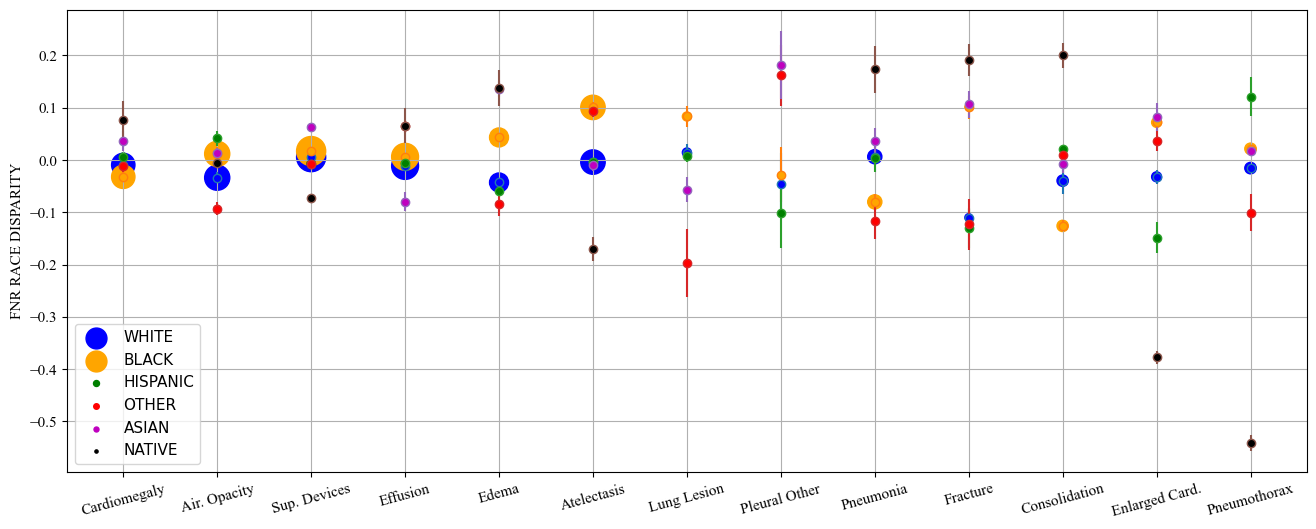

In [52]:
plt.rcParams.update({'font.size': font_size})
plt.figure(figsize=(16,height))

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
            s= np.multiply(race_tpr_disp_df['#White'],0.095), marker='o',color='blue', label="WHITE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
             yerr = race_tpr_disp_df['CI_W'],fmt='o',mfc='blue')#ecolor='blue'

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
            s= np.multiply(race_tpr_disp_df['#Black'],0.095), marker='o',color='orange', label="BLACK")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
             yerr = race_tpr_disp_df['CI_B'],fmt='o',mfc='orange')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
            s= np.multiply(race_tpr_disp_df['#Hisp'],0.095), marker='o',color='green', label="HISPANIC")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
             yerr = race_tpr_disp_df['CI_H'],fmt='o',mfc='green')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
            s= np.multiply(race_tpr_disp_df['#Other'],0.095), marker='o',color='r', label="OTHER")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
             yerr = race_tpr_disp_df['CI_Ot'],fmt='o',mfc='r')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean'],
            s= np.multiply(race_tpr_disp_df['#Asian'],0.095), marker='o',color='m', label="ASIAN")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean']
             ,yerr = race_tpr_disp_df['CI_As'],fmt='o',mfc='m')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
            s= np.multiply(race_tpr_disp_df['#American'],0.095), marker='o',color='k', label="NATIVE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
             yerr = race_tpr_disp_df['CI_Am'],fmt='o',mfc='k')

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("FNR RACE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./FNR_GAPS/TPR_Dis_RACE.pdf")

## 4.  Insurance

In [53]:
insurance_dataframes = [seed_19_insurance, seed_31_insurance, seed_38_insurance,
                        seed_47_insurance,seed_77_insurance]
result_insurance_df= pd.concat(insurance_dataframes)

result_insurance_grouped =result_insurance_df.groupby("diseases")
result_insurance_grouped_stat = result_insurance_grouped.describe()

In [54]:
result_insurance_grouped_stat

#medicare                                       \
                               count    mean  std     min     25%     50%   
diseases                                                                    
Atelectasis                      5.0  2277.0  0.0  2277.0  2277.0  2277.0   
Cardiomegaly                     5.0  2353.0  0.0  2353.0  2353.0  2353.0   
Consolidation                    5.0   495.0  0.0   495.0   495.0   495.0   
Edema                            5.0  1591.0  0.0  1591.0  1591.0  1591.0   
Enlarged Cardiomediastinum       5.0   336.0  0.0   336.0   336.0   336.0   
Fracture                         5.0   175.0  0.0   175.0   175.0   175.0   
Lung Lesion                      5.0   243.0  0.0   243.0   243.0   243.0   
Lung Opacity                     5.0  2477.0  0.0  2477.0  2477.0  2477.0   
No Finding                       5.0  2575.0  0.0  2575.0  2575.0  2575.0   
Pleural Effusion                 5.0  2683.0  0.0  2683.0  2683.0  2683.0   
Pleural Other                    5.0   105.0  0.0   105.0   105.0   105.0   
Pneumonia                        5.0   779.0  0.0   779.0   779.0   779.0   
Pneumothorax                     5.0   332.0  0.0   332.0   332.0   332.0   
Support Devices                  5.0  3046.0  0.0  3046.0  3046.0  3046.0   

                                           FNR_medicare          ...  \
                               75%     max        count    mean  ...   
diseases                                                         ...   
Atelectasis                 2277.0  2277.0          5.0  0.3236  ...   
Cardiomegaly                2353.0  2353.0          5.0  0.2990  ...   
Consolidation                495.0   495.0          5.0  0.6392  ...   
Edema                       1591.0  1591.0          5.0  0.3310  ...   
Enlarged Cardiomediastinum   336.0   336.0          5.0  0.8522  ...   
Fracture                     175.0   175.0          5.0  0.7762  ...   
Lung Lesion                  243.0   243.0          5.0  0.7500  ...   
Lung Opacity                2477.0  2477.0          5.0  0.2890  ...   
No Finding                  2575.0  2575.0          5.0  0.3160  ...   
Pleural Effusion            2683.0  2683.0          5.0  0.2220  ...   
Pleural Other                105.0   105.0          5.0  0.8400  ...   
Pneumonia                    779.0   779.0          5.0  0.6838  ...   
Pneumothorax                 332.0   332.0          5.0  0.6442  ...   
Support Devices             3046.0  3046.0          5.0  0.0996  ...   

                           FNR_medicaid        Gap_medicaid            \
                                    75%    max        count      mean   
diseases                                                                
Atelectasis                       0.293  0.333          5.0  0.000000   
Cardiomegaly                      0.391  0.398          5.0  0.024127   
Consolidation                     0.707  0.707          5.0  0.041243   
Edema                             0.435  0.446          5.0  0.040025   
Enlarged Cardiomediastinum        0.850  0.850          5.0 -0.003059   
Fracture                          0.781  0.812          5.0  0.009643   
Lung Lesion                       0.707  0.732          5.0  0.000000   
Lung Opacity                      0.269  0.299          5.0 -0.027331   
No Finding                        0.182  0.187          5.0 -0.015440   
Pleural Effusion                  0.239  0.249          5.0  0.015057   
Pleural Other                     0.625  0.688          5.0 -0.162213   
Pneumonia                         0.736  0.773          5.0  0.016588   
Pneumothorax                      0.521  0.521          5.0 -0.008681   
Support Devices                   0.100  0.103          5.0 -0.002497   

                                                                              \
                                 std       min       25%       50%       75%   
diseases                                                                       
Atelectasi

In [55]:
insurance_tpr_disp = pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [58]:
insurance_df_medicare_mean = result_insurance_grouped_stat['#medicare']['mean']
insurance_df_medicare_gap = result_insurance_grouped_stat['Gap_medicare']["mean"]
insurance_df_medicare_ci = significance_level * result_insurance_grouped_stat['Gap_medicare']["std"] / np.sqrt(number_of_runs)


In [59]:
insurance_df_other_mean = result_insurance_grouped_stat['#other']['mean']
insurance_df_other_gap = result_insurance_grouped_stat['Gap_other']["mean"]
insurance_df_other_ci = significance_level * result_insurance_grouped_stat['Gap_other']["std"] / np.sqrt(number_of_runs)


In [60]:
insurance_df_medicaid_mean = result_insurance_grouped_stat['#medicaid']['mean']
insurance_df_medicaid_gap = result_insurance_grouped_stat['Gap_medicaid']["mean"]
insurance_df_medicaid_ci = significance_level * result_insurance_grouped_stat['Gap_medicaid']["std"] / np.sqrt(number_of_runs)


In [61]:
percent_medicaid_list = []
ci_medicaid_list = []
gap_medicaid_mean_list = []

percent_medicare_list = []
ci_medicare_list = []
gap_medicare_mean_list = []

percent_other_list = []
ci_other_list = []
gap_other_mean_list = []

diseases_abbr_list = []
distance_list = []

In [62]:
for disease in diseases:
    mean_list = []

    percent_other_list.append(insurance_df_other_mean[disease])
    gap_other_mean_list.append(insurance_df_other_gap[disease])
    ci_other_list.append(insurance_df_other_ci[disease])
    mean_list.append(insurance_df_other_ci[disease])

    percent_medicare_list.append(insurance_df_medicare_mean[disease])
    gap_medicare_mean_list.append(insurance_df_medicare_gap[disease])
    ci_medicare_list.append(insurance_df_medicare_ci[disease])
    mean_list.append(insurance_df_medicare_ci[disease])

    percent_medicaid_list.append(insurance_df_medicaid_mean[disease])
    gap_medicaid_mean_list.append(insurance_df_medicaid_gap[disease])
    ci_medicaid_list.append(insurance_df_medicaid_ci[disease])
    mean_list.append(insurance_df_medicare_ci[disease])


    cleaned_mean_list= [x for x in mean_list if str(x) != 'nan']
    distance_list.append(np.max(cleaned_mean_list) - np.min(cleaned_mean_list))
    diseases_abbr_list.append(diseases_abbr[disease])

In [64]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "#Medicare": percent_medicare_list, 'Gap_C_mean': gap_medicare_mean_list, 'CI_C': ci_medicare_list,
     "#Other": percent_other_list, 'Gap_O_mean': gap_other_mean_list, 'CI_O': ci_other_list,
     "#Medicaid": percent_medicaid_list, 'Gap_A_mean': gap_medicaid_mean_list, 'CI_A': ci_medicaid_list
     }

In [65]:
insurance_tpr_disp_df = pd.DataFrame(d)
insurance_tpr_disp_df = insurance_tpr_disp_df.sort_values(by ='Distance' )
insurance_tpr_disp_df.to_csv("./FNR_GAPS/insurance_tpr_disp.csv",index=False)


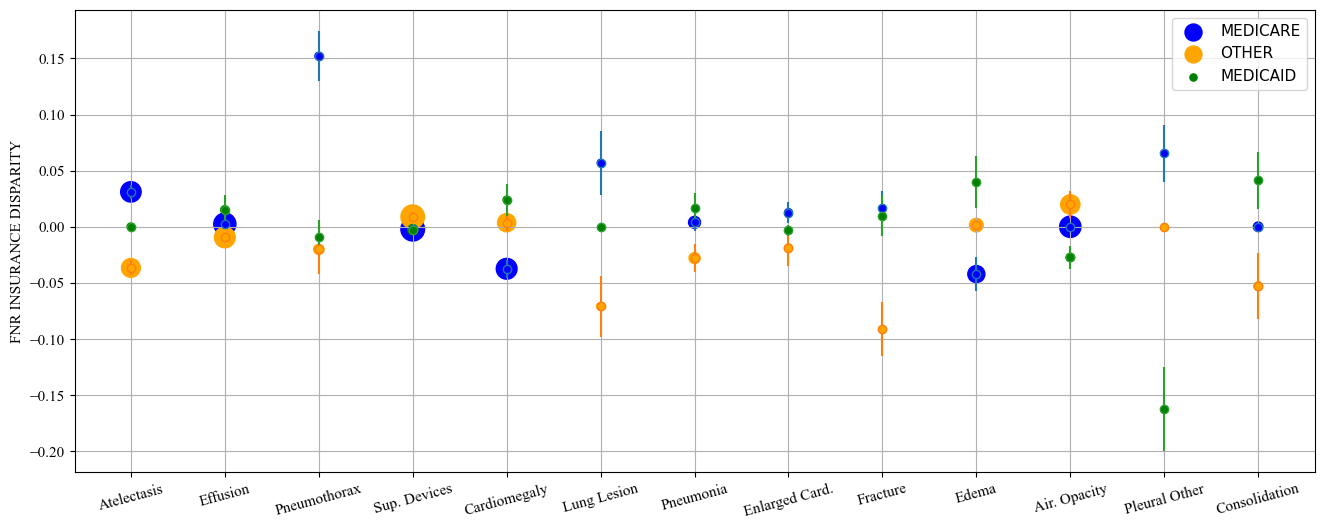

In [69]:
plt.rcParams.update({'font.size': font_size})

plt.figure(figsize=(16,height))
plt.scatter(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_C_mean'],
            s= np.multiply(insurance_tpr_disp_df['#Medicare'],0.095), marker='o',color='blue', label="MEDICARE")
plt.errorbar(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_C_mean'],
             yerr = insurance_tpr_disp_df['CI_C'],fmt='o',mfc='blue')

plt.scatter(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_O_mean'],
            s= np.multiply(insurance_tpr_disp_df['#Other'],0.095), marker='o',color='orange', label="OTHER")
plt.errorbar(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_O_mean'],
             yerr = insurance_tpr_disp_df['CI_O'],fmt='o',mfc='orange')

plt.scatter(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_A_mean'],
            s= np.multiply(insurance_tpr_disp_df['#Medicaid'],0.095), marker='o',color='green', label="MEDICAID")
plt.errorbar(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_A_mean'],
             yerr = insurance_tpr_disp_df['CI_A'],fmt='o',mfc='green')


plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("FNR INSURANCE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./FNR_GAPS/TPR_Dis_INSURANCE.pdf")